## Author: Asrar Syed

## Preliminary EDA with `seaborn`

Imagine you are a data scientist at a real estate company. Your task is to analyze real estate data from Atlanta and create insightful visualizations using `seaborn`.

**Requirements:**

- Use **Seaborn** for all visualizations unless explicitly instructed otherwise. **Do not use Matplotlib directly unless stated**.
- Follow [PEP 8 – the official Python style guide](https://www.python.org/dev/peps/pep-0008/).
  Clear, readable, and well-formatted code is expected throughout.  
  Submissions with poor formatting may receive point deductions.

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

You are welcome to choose your own color scheme and plot style.  

You can customize the appearance using `sns.set_theme()`, specifying your preferred `style` and `palette`.  
Feel free to explore options like `"muted"`, `"pastel"`, `"dark"`, or `"Set2"`, and adjust gridline settings to match your visual preferences.

If you'd like, you can modify the settings using the example Python cell below.  
The key is to keep your plots clean, readable, and *visually consistent*.

In [198]:
sns.set_theme(palette="Set2", style="whitegrid", 
              rc={"lines.linewidth": 1.5, 
                  "grid.color": "lightgrey",
                  "grid.linestyle": "-",
                  "grid.linewidth": 0.1})

In [199]:
df = pd.read_csv("real_estate_ga_modified.csv")
df.sample(5)

,id,countyId,cityId,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
5814,30068-14272299,200573,12562,0,0,Listed for sale,7/6/2021,420000,215,Marietta,...,1,2,1,Multi/Split,1,0,0,0,SINGLE_FAMILY,Cobb County
3615,30139-2071139583,130949,35602,0,0,Price change,7/1/2021,150000,0,Fairmount,...,0,0,0,0,0,0,0,0,LOT,Pickens County
9377,30002-97971641,312681,14956,0,0,Listed for sale,6/29/2021,614900,239,Avondale Estates,...,1,2,1,Two,0,0,1,0,SINGLE_FAMILY,Dekalb County
12749,31419-14148166,83424,47584,0,0,Sold,3/8/2018,125000,82,Savannah,...,0,2,1,0,0,0,0,0,SINGLE_FAMILY,Chatham County
4847,31909-76562444,173518,17539,0,0,Price change,7/11/2021,369000,145,Columbus,...,1,2,1,One,0,0,0,0,SINGLE_FAMILY,Muscogee County


#### 0. Begin by exploring the dataset using appropriate pandas methods. [2pts]

**Task.** Generate summary tables that describe the characteristics of both numerical and categorical variables.

In [200]:
# Summary statistics for all numerical columns
df.describe()

,countyId,cityId,is_bankOwned,is_forAuction,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,latitude,...,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
count,13803.000000,13803.000000,13803.000000,13803.000000,1.380300e+04,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,...,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000
mean,142662.084837,32139.893719,0.000145,0.000435,3.671090e+05,101.938347,1347.390567,30670.259654,-83.776617,33.345782,...,1.877998,2.348547,1177.075129,0.460262,0.488300,0.354778,0.054408,0.060711,0.045787,0.003840
std,98059.705183,37907.786930,0.012037,0.020845,6.478566e+05,121.735696,928.131914,557.068903,1.050702,1.060890,...,1.886286,2.076569,1813.755372,0.498436,0.929435,0.478463,0.226830,0.238809,0.209031,0.061849
min,17.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,30002.000000,-85.583374,30.626259,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58012.500000,13709.000000,0.000000,0.000000,9.500000e+04,0.000000,0.000000,30206.000000,-84.456635,32.623348,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,116675.000000,29242.000000,0.000000,0.000000,2.470000e+05,95.000000,1965.000000,30530.000000,-84.070831,33.700333,...,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,227609.500000,43250.000000,0.000000,0.000000,4.250000e+05,161.000000,1999.000000,31061.000000,-83.358616,34.038994,...,3.000000,4.000000,1996.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,333689.000000,397383.000000,1.000000,1.000000,3.050400e+07,3353.000000,9999.000000,31909.000000,-80.841385,34.993996,...,89.000000,89.000000,87120.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
# Summary statistics for all categorical columns
df.describe(include=['object', 'category'])

,id,event,time,city,streetAddress,lotAreaUnits,levels,homeType,county
count,13803,13803,13803,13803,13803,13803,13803,13803,13803
unique,12545,6,577,536,12451,2,41,5,149
top,30161-2070194652,Listed for sale,7/10/2021,Atlanta,Coming Soon Plan,Acres,0,SINGLE_FAMILY,Fulton County
freq,2,9519,2030,1031,30,9797,6524,8110,1168


#### 1. List all numerical and categorical variables. How many features are numeric, and how many are categorical? [4 pts]

In [202]:
# List of numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Features:", numerical_features)
print("\nCategorical Features:", categorical_features)

Numerical Features: ['countyId', 'cityId', 'is_bankOwned', 'is_forAuction', 'price', 'pricePerSquareFoot', 'yearBuilt', 'zipcode', 'longitude', 'latitude', 'livingArea', 'livingAreaValue', 'bathrooms', 'bedrooms', 'buildingArea', 'parking', 'garageSpaces', 'hasGarage', 'pool', 'spa', 'isNewConstruction', 'hasPetsAllowed']

Categorical Features: ['id', 'event', 'time', 'city', 'streetAddress', 'lotAreaUnits', 'levels', 'homeType', 'county']


In [203]:
# Number of each type
print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")

Number of numerical features: 22
Number of categorical features: 9


#### 2. Identify variables that are stored as numerical but represent categories (e.g., codes or labels). Convert them to the categorical data type for proper analysis. [2 pts]

In [204]:
# Personal Visual: Before
df.dtypes

id                     object
countyId                int64
cityId                  int64
is_bankOwned            int64
is_forAuction           int64
event                  object
time                   object
price                   int64
pricePerSquareFoot      int64
city                   object
yearBuilt               int64
streetAddress          object
zipcode                 int64
longitude             float64
latitude              float64
livingArea              int64
livingAreaValue         int64
lotAreaUnits           object
bathrooms               int64
bedrooms                int64
buildingArea            int64
parking                 int64
garageSpaces            int64
hasGarage               int64
levels                 object
pool                    int64
spa                     int64
isNewConstruction       int64
hasPetsAllowed          int64
homeType               object
county                 object
dtype: object

In [205]:
# Identify the columns that are numeric, but have low unique values
potential_cats = [col for col in df.select_dtypes(include=['int64', 'float64']) if df[col].nunique() < 10]

print("Possible to convert the following to 'category':\n")

for col in potential_cats:
    print(f"{col}: {df[col].nunique()} unique values")

Possible to convert the following to 'category':

is_bankOwned: 2 unique values
is_forAuction: 2 unique values
parking: 2 unique values
garageSpaces: 9 unique values
hasGarage: 2 unique values
pool: 2 unique values
spa: 2 unique values
isNewConstruction: 2 unique values
hasPetsAllowed: 2 unique values


In [206]:
# Convert all flagged numerical columns to categorical data type
df[potential_cats] = df[potential_cats].astype('category')

In [207]:
# Personal Visual: After
df.dtypes

id                      object
countyId                 int64
cityId                   int64
is_bankOwned          category
is_forAuction         category
event                   object
time                    object
price                    int64
pricePerSquareFoot       int64
city                    object
yearBuilt                int64
streetAddress           object
zipcode                  int64
longitude              float64
latitude               float64
livingArea               int64
livingAreaValue          int64
lotAreaUnits            object
bathrooms                int64
bedrooms                 int64
buildingArea             int64
parking               category
garageSpaces          category
hasGarage             category
levels                  object
pool                  category
spa                   category
isNewConstruction     category
hasPetsAllowed        category
homeType                object
county                  object
dtype: object

#### 3. Plot histograms for all genuinely numerical variables (i.e., those that represent continuous quantities, not categorical codes stored as numbers). [4 pts] 

Use 50 equal-width bins and include a kernel density estimate (KDE) to visualize distributions.

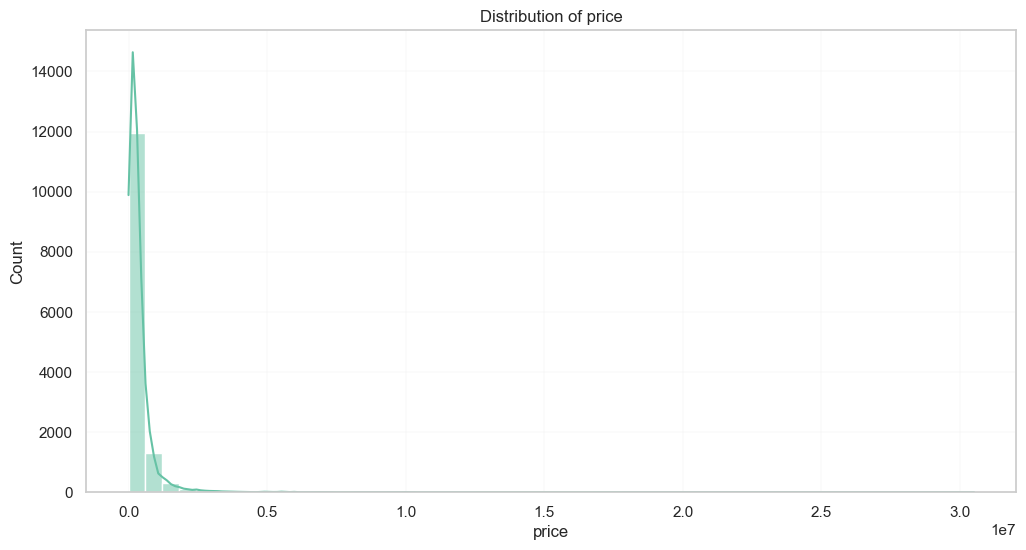

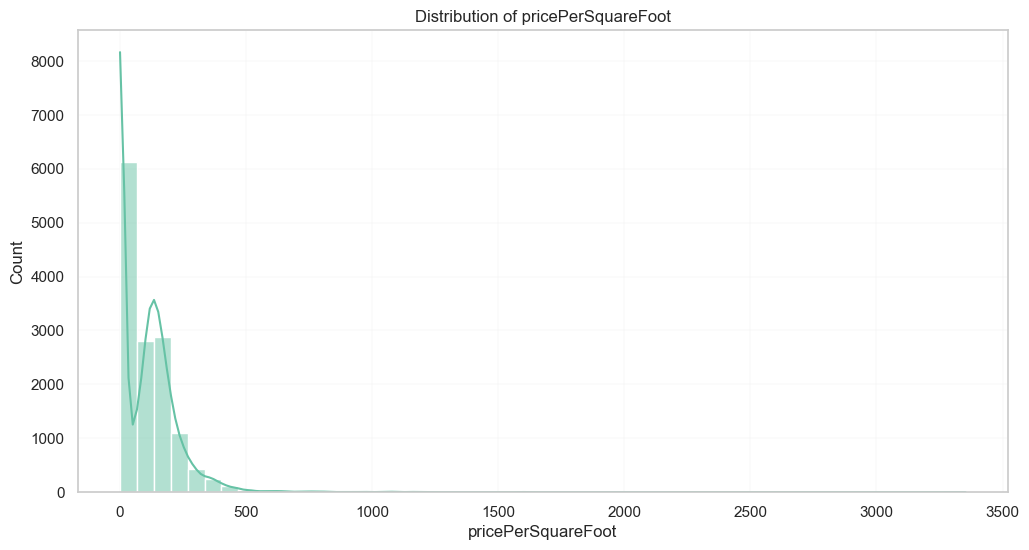

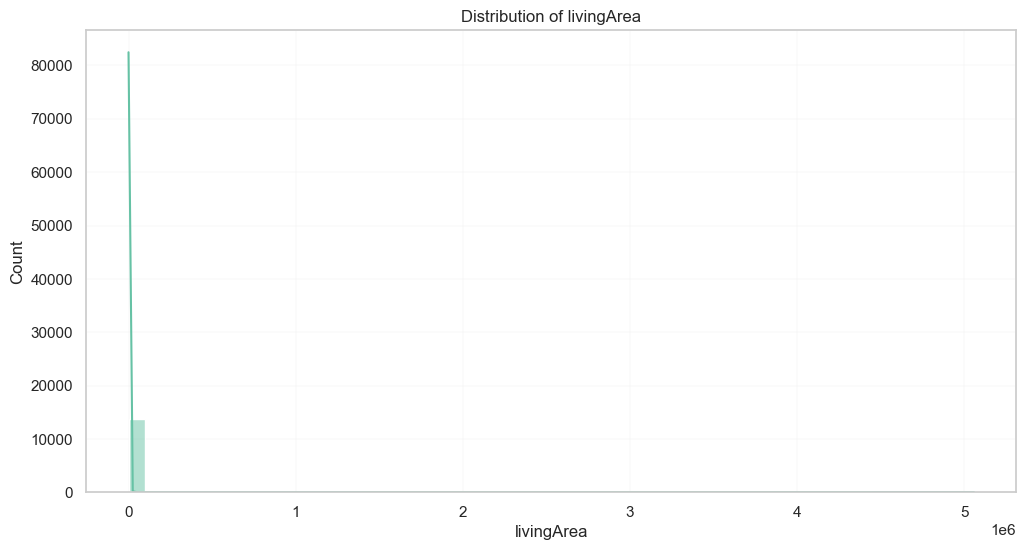

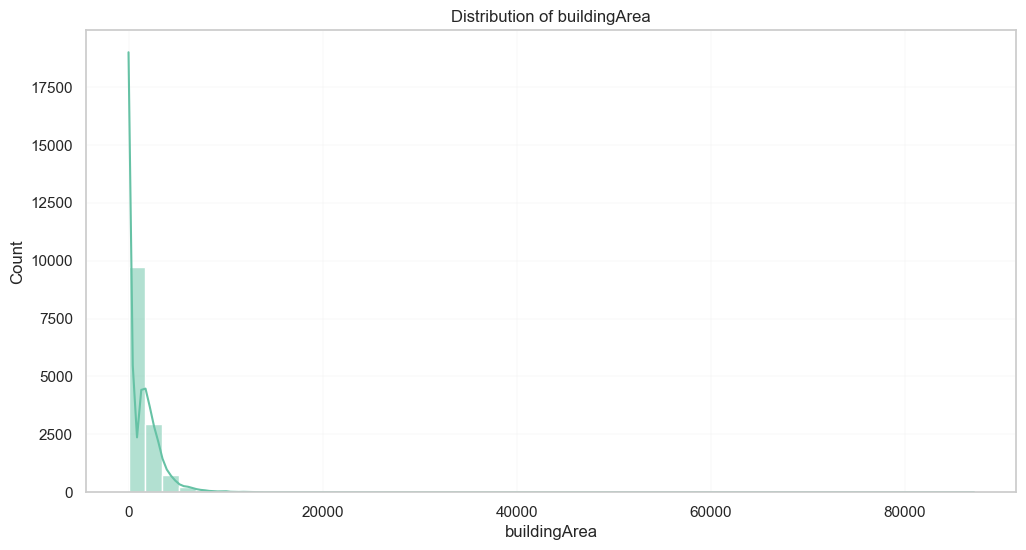

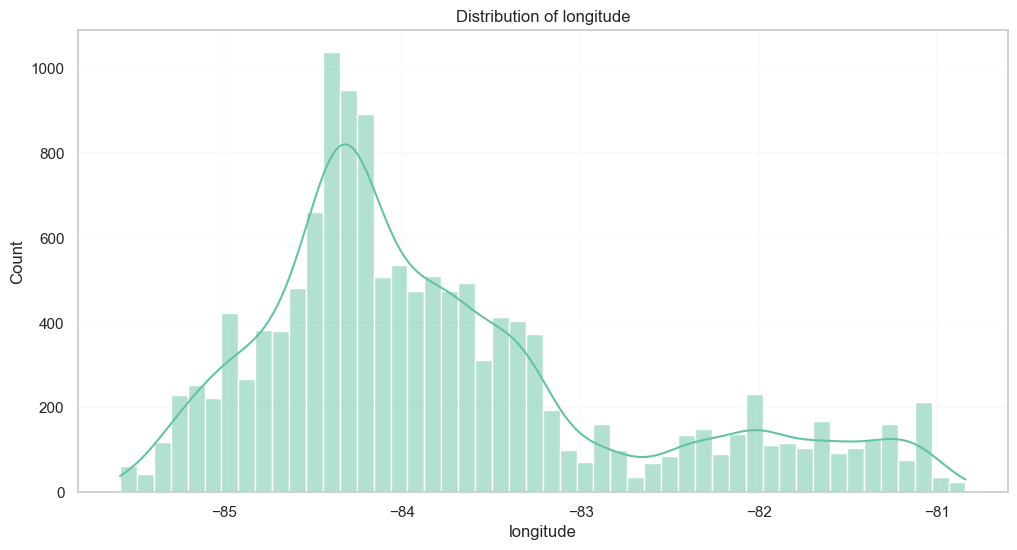

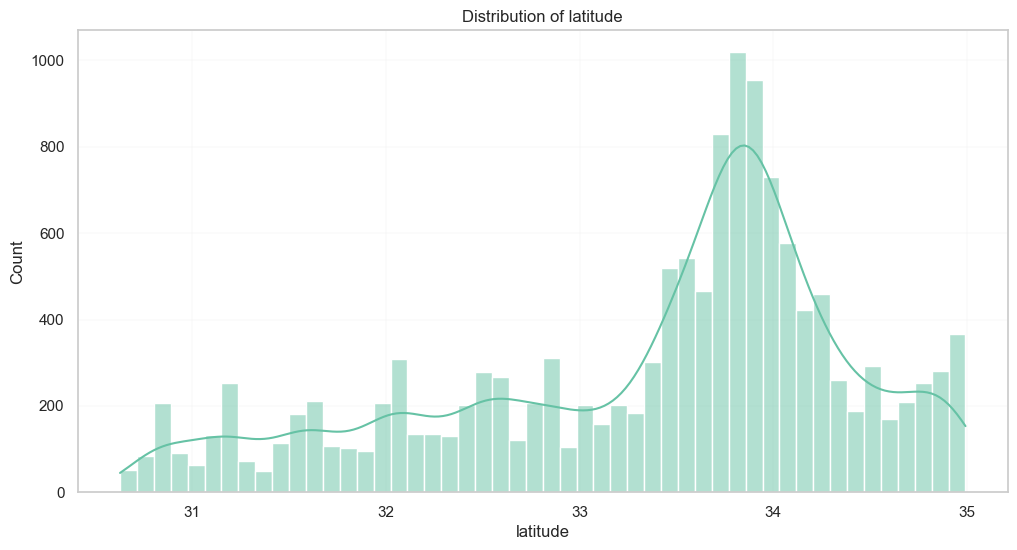

In [208]:
# Plotting histograms
genuine_numeric_cols = ['price', 'pricePerSquareFoot', 'livingArea', 'buildingArea', 'longitude', 'latitude']

for col in genuine_numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=col, bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### 4. Many variables exhibit highly skewed distributions, which makes it difficult to interpret their patterns and details. [6 pts]

How can we address this issue? One common approach is to apply a log transformation to reduce skewness and enhance visibility.  

**Task.**
- Apply log transformation where appropriate.  
- Which variables would benefit from it, and which will not? Justify your choices.

Keep using 50 equal-width bins and include a kernel density estimate (KDE) to visualize distributions.

When dealing with highly skewed distributions, such as price or area (which tend to be right-skewed), a log transformation can help normalize the data, making patterns easier to interpret. By adding one to avoid undefined values for zero and then applying the natural log, the data becomes less skewed and more suitable for analysis. Many data analysis algorithms assume normality, hence the closer the data is to normal, the better the model fits these assumptions.

In [209]:
# Apply log transformation to positively skewed variables
df['log_price'] = np.log(df['price'] + 1)
df['log_pricePerSquareFoot'] = np.log(df['pricePerSquareFoot'] + 1)
df['log_livingArea'] = np.log(df['livingArea'] + 1)
df['log_buildingArea'] = np.log(df['buildingArea'] + 1)

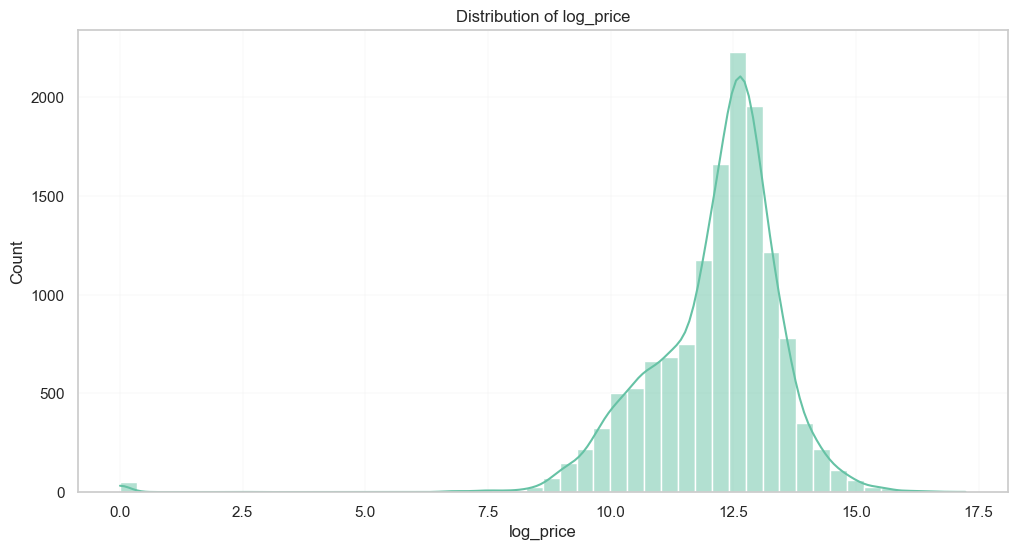

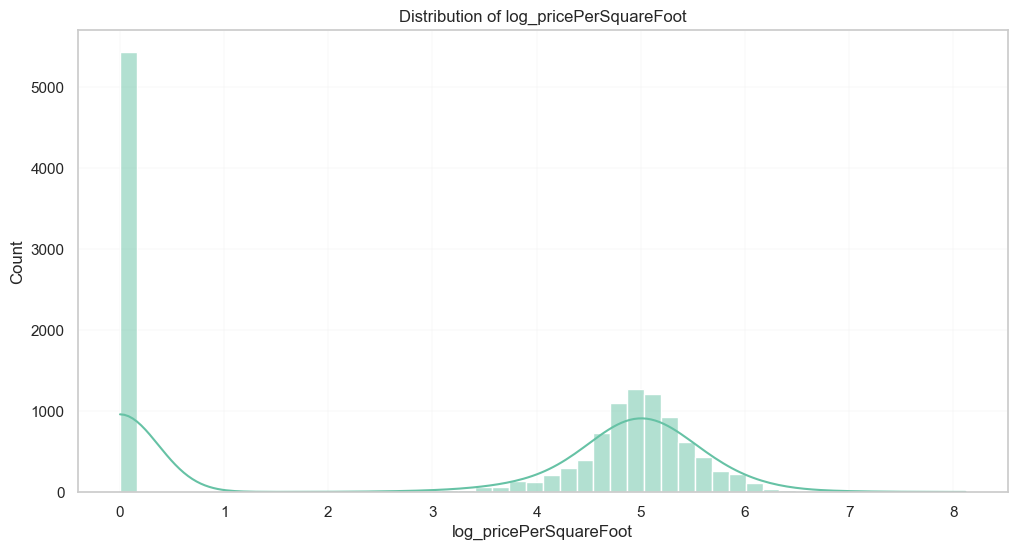

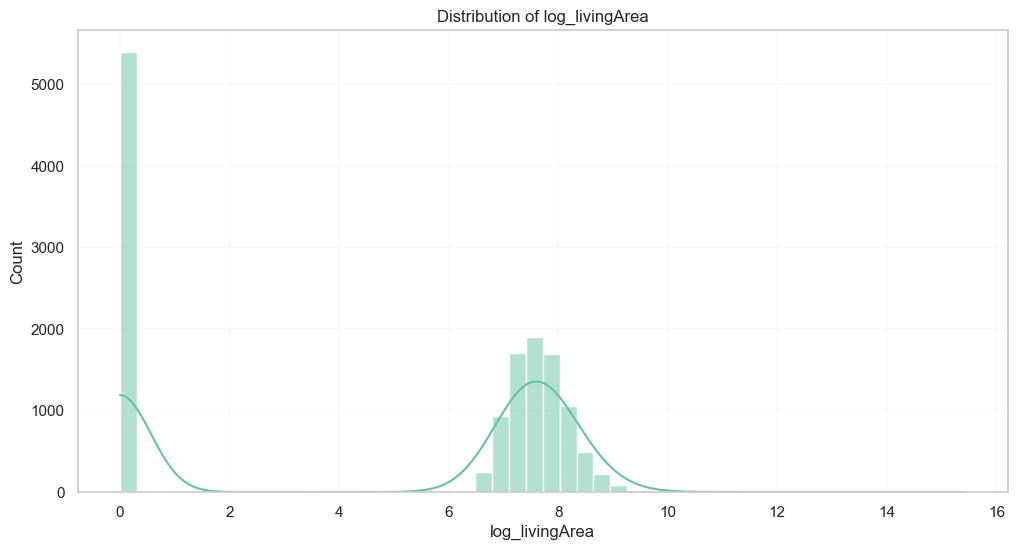

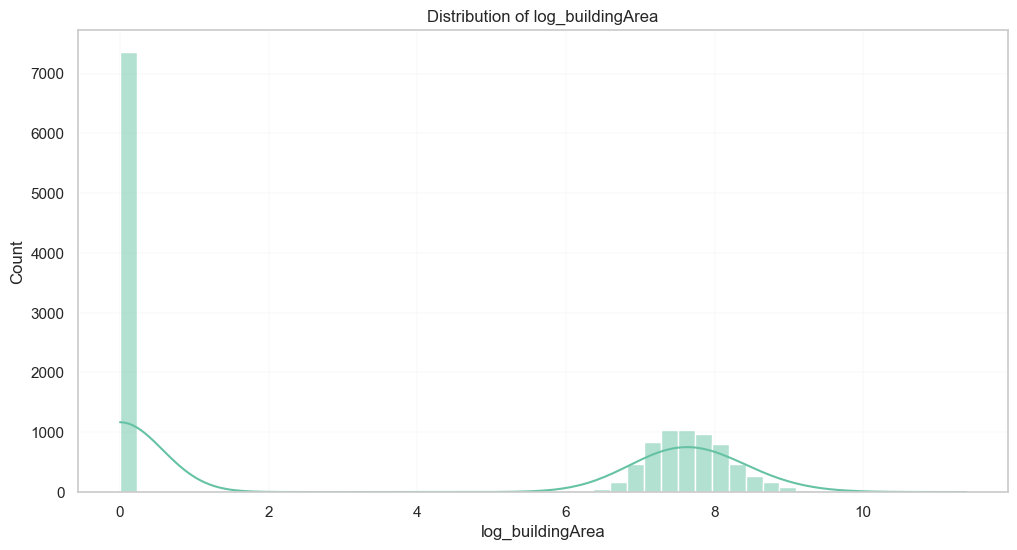

In [210]:
# Personal Visual: After
log_transformed_cols = ['log_price', 'log_pricePerSquareFoot', 'log_livingArea', 'log_buildingArea']

for col in log_transformed_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=col, bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### 5. After applying a log transformation, you may see the following warning:  [6 pts]
`RuntimeWarning: invalid value encountered in subtract sqr = _ensure_numeric((avg - values) ** 2)`

This warning typically occurs when the data contains invalid values for mathematical operations (such as `NaN`, `inf`, or `-inf`).  
In the context of a log transformation, what is the most likely cause of this issue?

**Task.**
- Identify and resolve the issue causing this warning.  
- Make sure that your plots do not produce this warning.


**Disclaimer: I am not getting this RuntimeWarning because I added +1 hence I avoid taking the log of zero.**

But in the context of log transformation, the most likely cause is that whenever we try to take the log of zero or negative values, it results in `-inf` or `NaN`.

In [211]:
# Option 1: Add 1 before logging (Fine for variables without non-negative values)
    # df['log_price'] = np.log(df['price'] + 1)

# Option 2: Filter out values less than zero
    # df = df[df['price'] > 0]
    # df['log_price'] = np.log(df['price'])

# Option 3: Replace any invalid values after log
    # df['log_price'] = np.log(df['price'] + 1)
    # df['log_price'].replace([np.inf, -np.inf], np.nan, inplace=True)
    # df = df.dropna(subset=['log_price'])

**Again, I don't need to do this because I am not getting the RuntimeWarning**

#### 6. Now let's work with the `'yearBuilt'` variable. [4 pts]

**Task.** Fix the histogram by removing zero values (which represent missing data) and filtering out obviously erroneous years (e.g., values far in the future).

In [212]:
# Remove rows where yearBuilt has missing data
df = df[(df['yearBuilt'] != 0)]

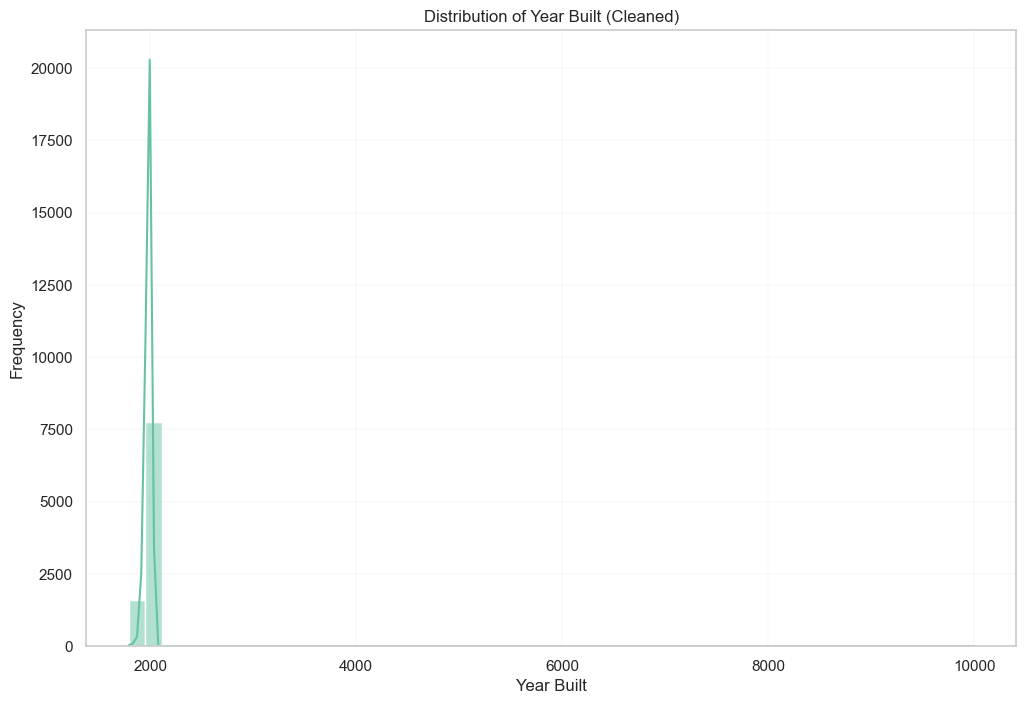

In [213]:
# Plotting the histogram
plt.figure(figsize=(12, 8))
sns.histplot(df['yearBuilt'], bins=50, kde=True)
plt.title('Distribution of Year Built (Cleaned)')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

#### 7. Now it's time to create count plots (or bar plots, if preferred) for categorical variables where it makes sense to visualize their distributions. [4 pts]

Plotting categorical variables is most effective when the number of unique categories is manageable. Let's break it down:

- If a variable has **4 or fewer categories**, plot a count plot using the **x-axis** for the categories.
- If it has **between 5 and 49 categories**, a count plot is still useful, but consider using the **y-axis** for better readability.
- If a variable has **50 or more categories**, especially when the number is much higher, you may want to **group or aggregate categories** before plotting.
- For variables with extremely high cardinality, say more than 10,000 (e.g., `'id'`), it usually makes **little sense to plot them at all**, as the visualization will be cluttered and uninformative.


**Task.** Categorize the categorical variables in your dataset based on these rules. Which variables fall into each group?


In [214]:
# Get all categorical variables
categorical_features = df.select_dtypes(include=['category', 'object']).columns

# Group variables based on the number of unique categories
typeone_features = [col for col in categorical_features if df[col].nunique() <= 4]
typetwo_features = [col for col in categorical_features if 5 <= df[col].nunique() <= 49]
typethree_features = [col for col in categorical_features if df[col].nunique() >= 50]

print("Type 1 - (4 or fewer categories):", typeone_features)
print("\nType 2 - (5 to 49 categories):", typetwo_features)
print("\nType 3 - (50 or more categories):", typethree_features)

Type 1 - (4 or fewer categories): ['is_bankOwned', 'is_forAuction', 'lotAreaUnits', 'parking', 'hasGarage', 'pool', 'spa', 'isNewConstruction', 'hasPetsAllowed']

Type 2 - (5 to 49 categories): ['event', 'garageSpaces', 'levels', 'homeType']

Type 3 - (50 or more categories): ['id', 'time', 'city', 'streetAddress', 'county']


**Printed above**

#### 8. Let's plot count plots for features that have 4 or fewer categories.

*You don't need to write any code here – just focus on understanding how it's done.*  
Review the Python cell below to see how such plots can be created effectively.


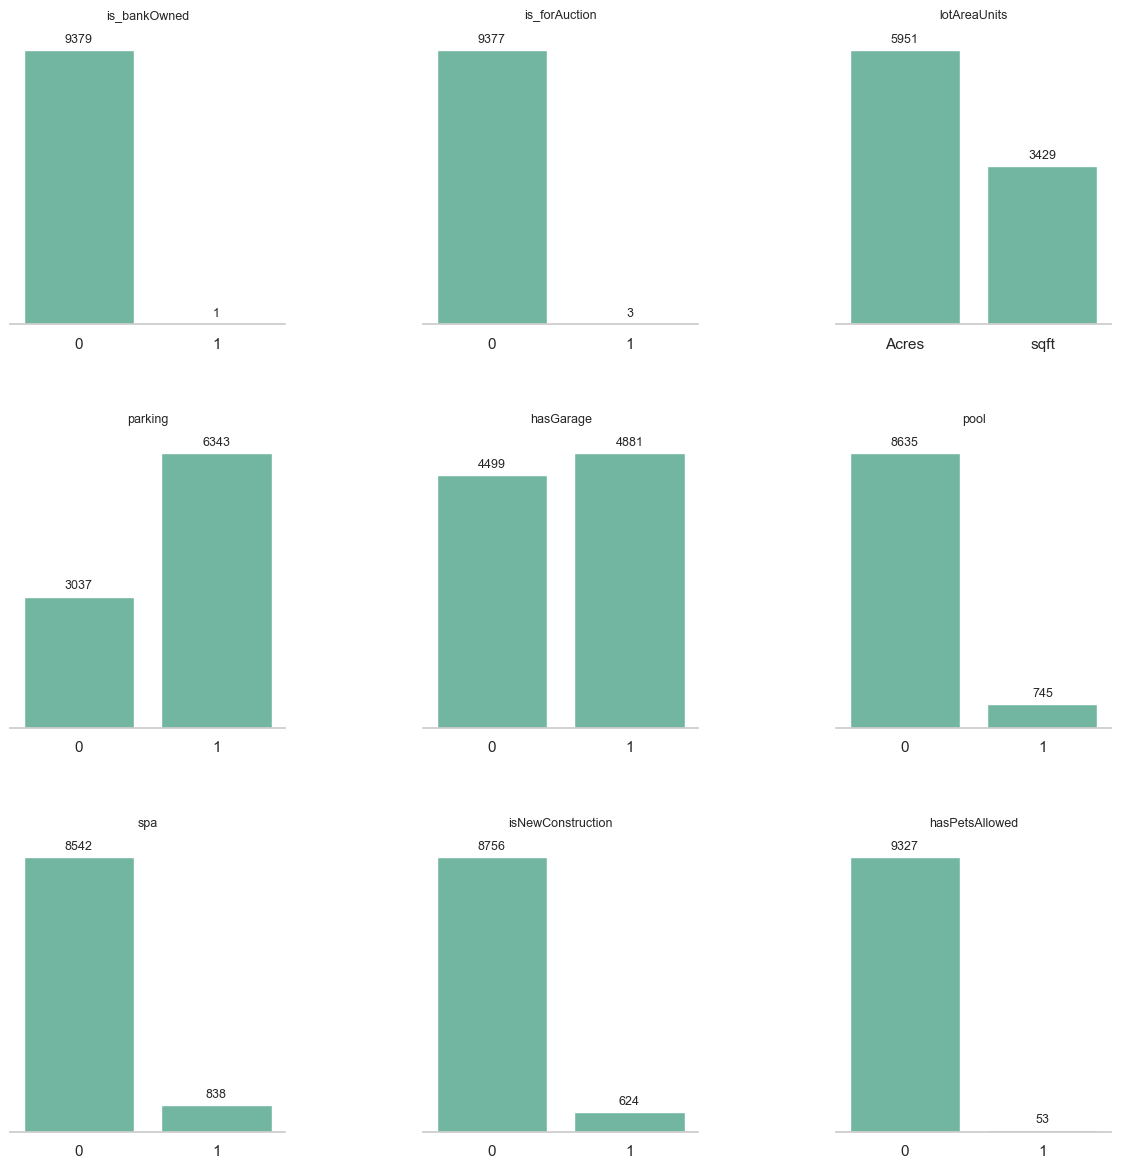

In [215]:
typeone_features = [col for col in df.select_dtypes(include=['category', 'object']).columns if df[col].nunique() <= 4]
df_melted = df[typeone_features].melt(var_name='Feature', value_name='Value')

g = sns.catplot(
    data=df_melted,
    x='Value',
    col='Feature',
    kind='count',
    col_wrap=3,   
    height=4,
    aspect=1,
    sharex=False,
    sharey=False
)

for ax in g.axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')      
    ax.set_yticks([])  
    ax.tick_params(left=False, bottom=False)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=9, padding=3)

g.figure.subplots_adjust(hspace=0.4, wspace=0.5)
g.set_titles("{col_name}", size=9, pad=12)
sns.despine(left=True)

If you prefer to use the Matplotlib interface directly, it can be done as shown below.

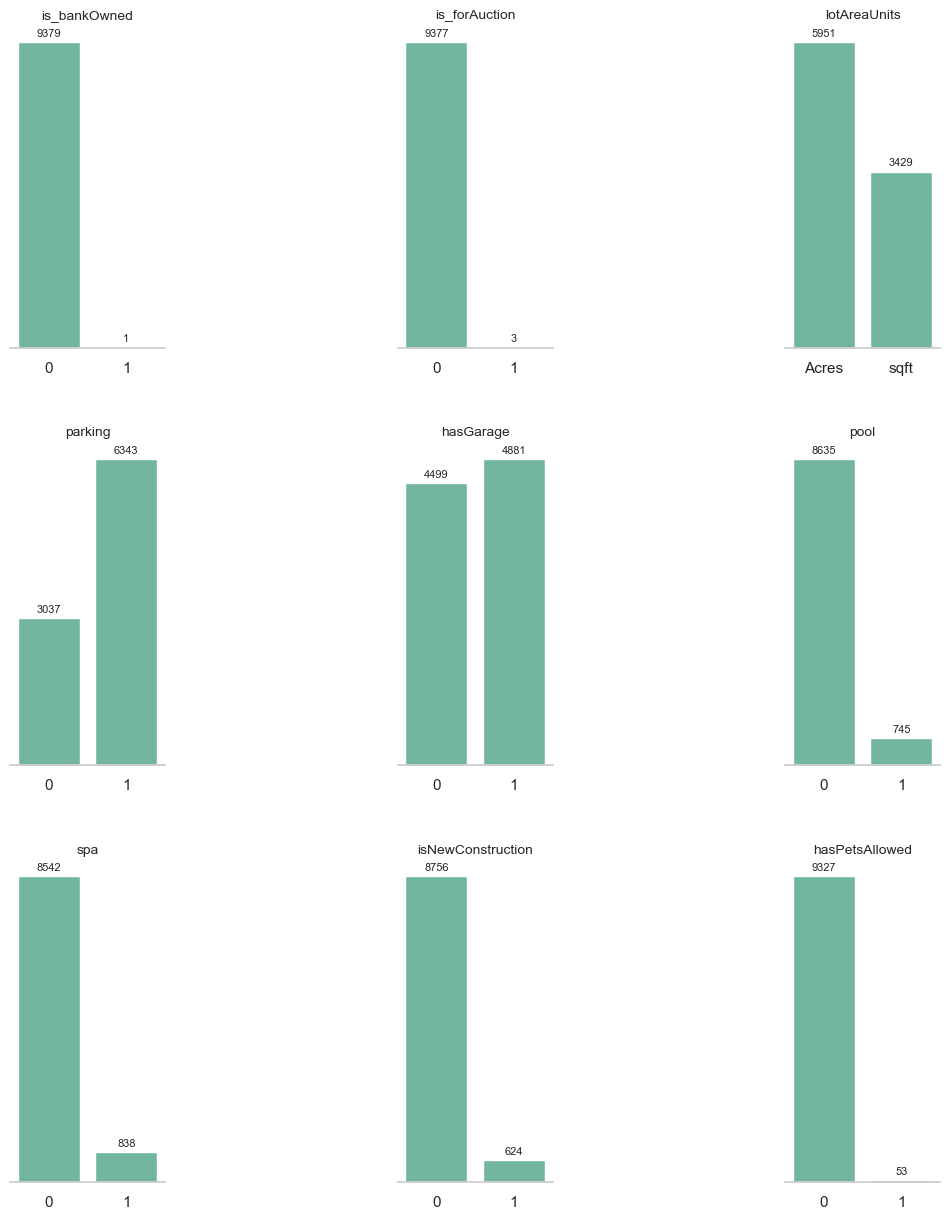

In [216]:
typeone_features = [col for col in df.select_dtypes(include=['category', 'object']).columns if df[col].nunique() <= 4]

ROWS, COLS = 3, 3
fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 5))
axs = axs.flatten() 
plt.subplots_adjust(hspace=0.3, wspace=1.5)

for i, feature in enumerate(typeone_features): 
    ax = axs[i]
    sns.countplot(data=df, x=feature, ax=ax)
    ax.set_title(feature, size=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.tick_params(left=False, axis='y', labelsize=9)
    sns.despine(ax=ax, left=True)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, padding=3)


for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

#### 9. Now let’s plot count plots for features that have between 5 and 49 categories. [12 pts]

Follow the structure of the previous Python cell, but adapt the code to handle features with a larger number of categories.  
Ensure that all category labels are clearly legible and that the plots remain easy to interpret.  
Remember that **sorting by count** often improves readability and helps highlight the most common categories.

You can use matplotlib here.

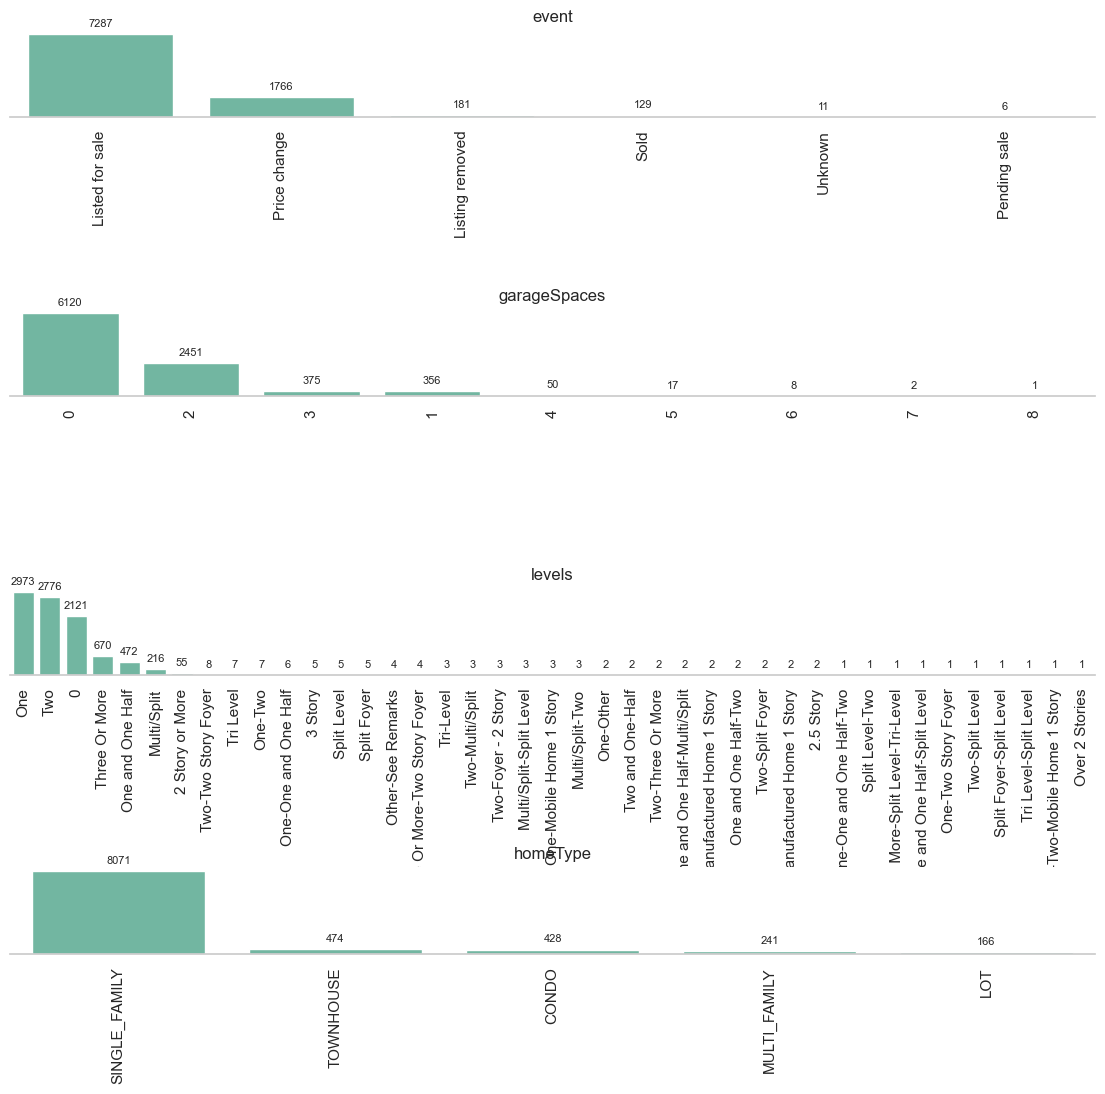

In [217]:
# Creating the grid of subplots
fig, axs = plt.subplots(len(typetwo_features), 1, figsize=(14, ROWS * 4))
axs = axs.flatten()

plt.subplots_adjust(hspace=2.2)  # tldr: spacing between subplots (more space)

# Loop through each variable feature and plot
for i, feature in enumerate(typetwo_features):
    ax = axs[i]
    
    # Sort categories by frequency
    sns.countplot(data=df, x=feature, ax=ax, order=df[feature].value_counts().index)
    
    ax.set_title(feature, size=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.tick_params(left=False, axis='y', labelsize=9)
    sns.despine(ax=ax, left=True)
    
    # Rotate x-axis labels for better readability
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
    # Add count labels to each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, padding=4)

plt.show()

#### 10. Now let's visualize high-cardinality variables: starting with `time` [4 pts]

Variables with a large number of unique categories can make bar plots cluttered and hard to interpret.  
A good first step is to aggregate the data to reduce complexity.

Let’s begin with the `time` column.

**Task:**
- Convert the `'time'` column to datetime format using `pd.to_datetime()`.
- Extract the **year** from the `'time'` column and store it in a new column called `'year'`.
- Create a **count plot** that shows the number of records for each year, sorted chronologically.
- Tidy up the plot by hiding the x-axis ticks and adding value labels to each bar for clarity.

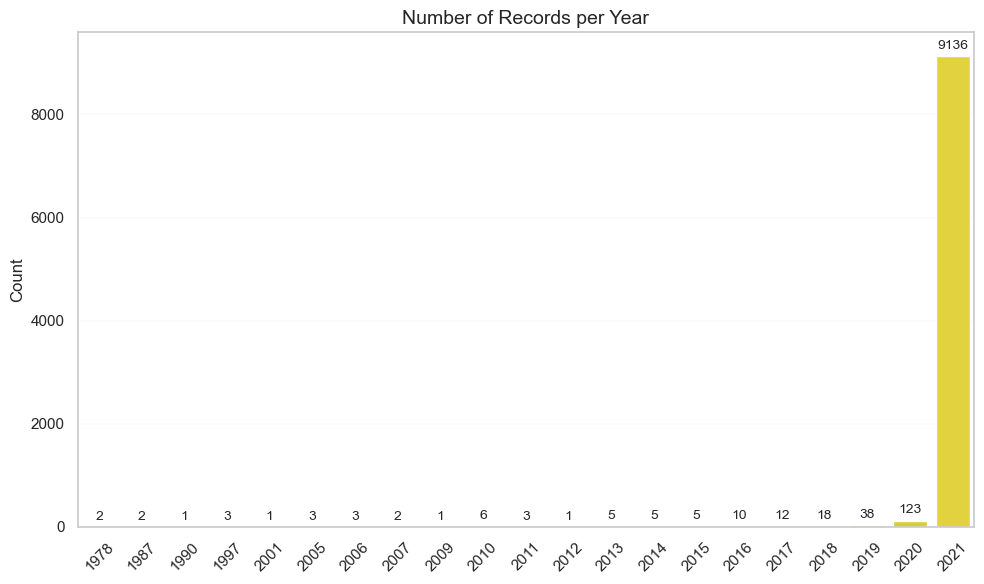

In [218]:
# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], errors='coerce')  # 'errors="coerce"' will handle invalid date formats

# Extract the 'year' from the 'time' column
df['year'] = df['time'].dt.year

# Create the count plot that's sorted chronologically
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', hue='year', legend=False, order=sorted(df['year'].dropna().unique()), palette='viridis')

# Visually organizing the plot
plt.title('Number of Records per Year', fontsize=14)
plt.xlabel('')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotated the labels for better readability
plt.tight_layout()

# Add value labels to each bar
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

plt.show()

#### 11. Visualizing year with simplified grouping [6 pts]

Plotting each year individually can sometimes result in a cluttered or less informative visualization – especially when older years have very few listings.

**Task:**

- Starting from the `'year'` column, group all years **before 2019** into a single category called `"Before 2019"`.  
- Keep the remaining years unchanged (e.g., 2019, 2020, etc.).  
- Create a **count plot** using the new `'year_grouped'` variable, making sure `"Before 2019"` appears first on the *x-axis*.  
- Add value labels to the bars and ensure the plot is clean, readable, and visually consistent.


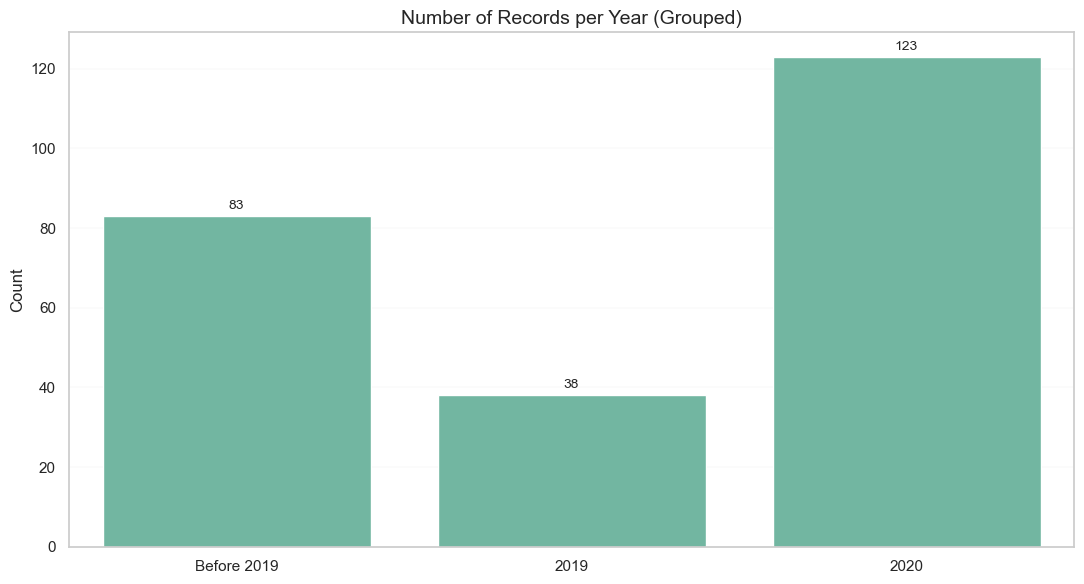

In [219]:
# Group years before 2019 into a single category "Before 2019"
df['year_grouped'] = df['year'].apply(lambda x: 'Before 2019' if x < 2019 else str(x))

# Create the count plot with "Before 2019" appearing first on the x-axis
plt.figure(figsize=(11, 6))
sns.countplot(x='year_grouped', data=df, order=['Before 2019'] + sorted(df['year_grouped'].unique().tolist()[1:]))

# Visually organizing the plot
plt.title('Number of Records per Year (Grouped)', fontsize=14)
plt.xlabel('')
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to avoid label clipping

# Add value labels to each bar
ax = plt.gca()  # Get the current axis
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

plt.show()

#### 12. Visualize `'county'`, `'zipcode'`, `'city'`, and `'cityId'`.  [10 pts]

Variables `'county'`, `'zipcode'`, `'city'`, and `'cityId'` a large number of unique values, making it difficult to visualize the full distribution effectively. 
A common approach is to display only the top N most frequent categories.

**Task:**
- For each feature, compute the top 15 most frequent values.  
- Create a subplot (2 rows by 2 columns) showing a horizontal bar plot for each feature.  
- Make sure each subplot:
   - Has a clean, readable title  
   - Hides axis ticks to reduce visual clutter  
   - Includes count labels on the bars  
  
Use consistent styling and axis formatting across all subplots. 

You can use matplotlib here.

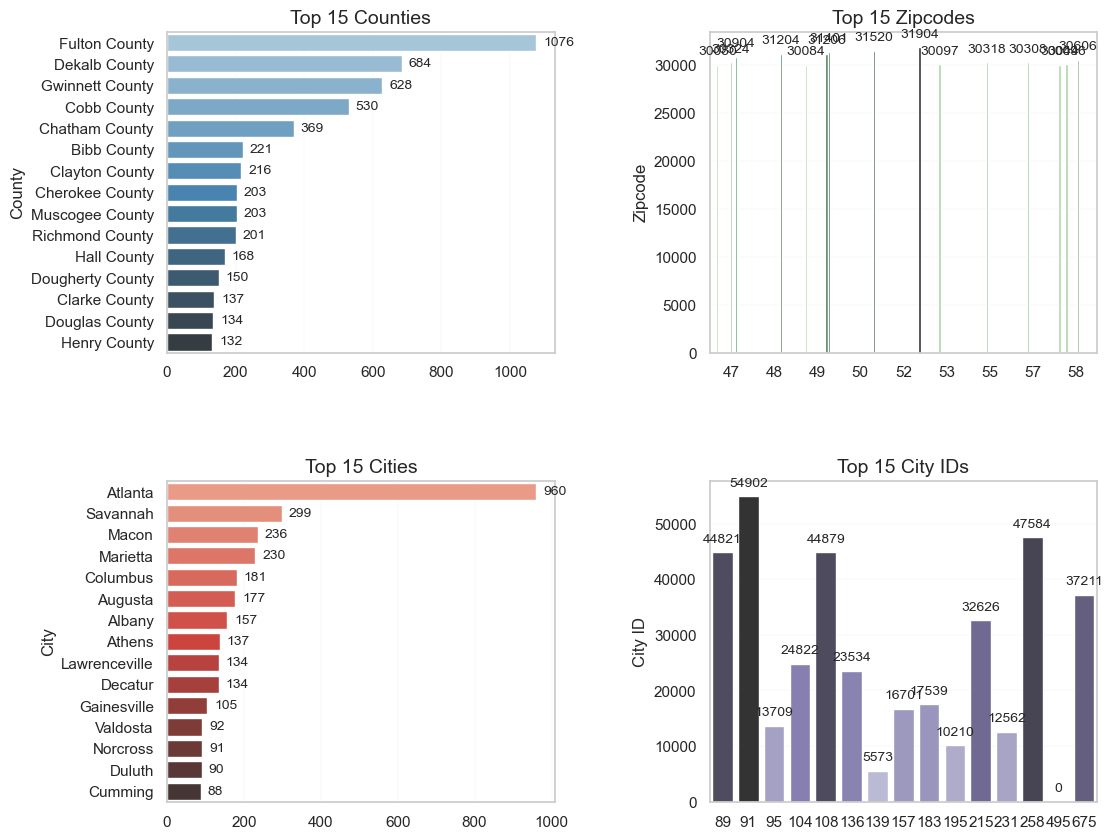

In [220]:
# Computing the top 15 most frequent values for each feature
top_county = df['county'].value_counts().head(15)
top_zipcode = df['zipcode'].value_counts().head(15)
top_city = df['city'].value_counts().head(15)
top_cityId = df['cityId'].value_counts().head(15)

# Creating the 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot for 'county'
sns.barplot(x=top_county.values, y=top_county.index, hue=top_county.index, legend=False, ax=axs[0, 0], palette='Blues_d')
axs[0, 0].set_title('Top 15 Counties', fontsize=14)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('County', fontsize=12)
axs[0, 0].tick_params(axis='x', which='both', bottom=False)  # Hide x-axis ticks
for container in axs[0, 0].containers:
    axs[0, 0].bar_label(container, fmt='%d', fontsize=10, padding=5)

# Plot for 'zipcode'
sns.barplot(x=top_zipcode.values, y=top_zipcode.index, hue=top_zipcode.index, legend=False, ax=axs[0, 1], palette='Greens_d')
axs[0, 1].set_title('Top 15 Zipcodes', fontsize=14)
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Zipcode', fontsize=12)
axs[0, 1].tick_params(axis='x', which='both', bottom=False)
for container in axs[0, 1].containers:
    axs[0, 1].bar_label(container, fmt='%d', fontsize=10, padding=5)

# Plot for 'city'
sns.barplot(x=top_city.values, y=top_city.index, hue=top_city.index, legend=False, ax=axs[1, 0], palette='Reds_d')
axs[1, 0].set_title('Top 15 Cities', fontsize=14)
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('City', fontsize=12)
axs[1, 0].tick_params(axis='x', which='both', bottom=False)
for container in axs[1, 0].containers:
    axs[1, 0].bar_label(container, fmt='%d', fontsize=10, padding=5)

# Plot for 'cityId'
sns.barplot(x=top_cityId.values, y=top_cityId.index, hue=top_cityId.index, legend=False, ax=axs[1, 1], palette='Purples_d')
axs[1, 1].set_title('Top 15 City IDs', fontsize=14)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('City ID', fontsize=12)
axs[1, 1].tick_params(axis='x', which='both', bottom=False)
for container in axs[1, 1].containers:
    axs[1, 1].bar_label(container, fmt='%d', fontsize=10, padding=5)

plt.show()

#### 13. Highlighting a Specific Category in a Bar Plot [6 pts]

When visualizing high-cardinality categorical variables, it can be helpful to draw attention to specific values of interest.

**Task:**
- Focus on the `'county'` variable and extract the **top 15 most frequent counties**.  
- Create a bar plot that displays these counties and their corresponding counts.  
- Highlight one specific county – `"Dekalb County"` – using a distinct color (`orange`), while coloring the rest in `lightgray`.  

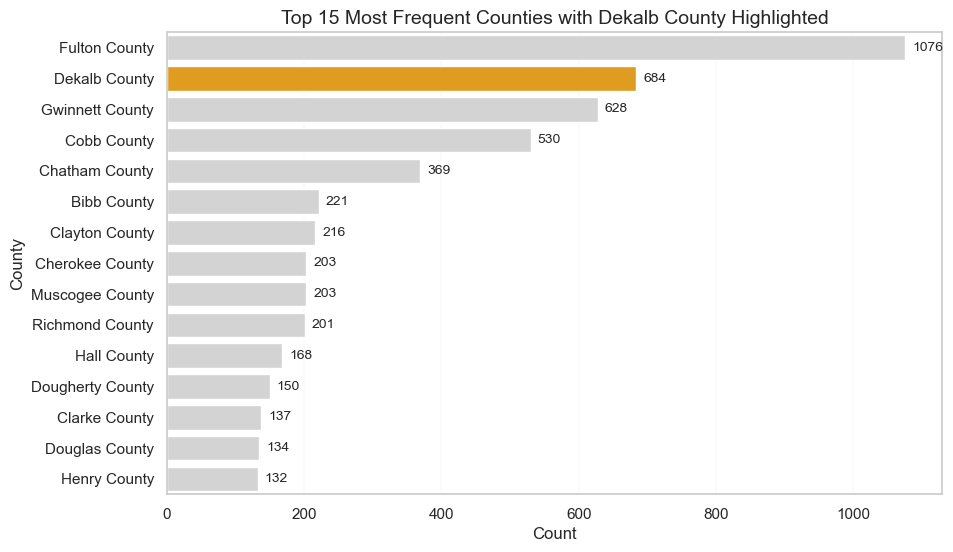

In [221]:
# Extracting the top 15 most frequent counties
top_counties = df['county'].value_counts().head(15)

# Setting color list rules
colors = ['orange' if county == 'Dekalb County' else 'lightgray' for county in top_counties.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_counties.values, hue=top_counties.index, legend=False, y=top_counties.index, palette=colors)

# Add labels and title
plt.title('Top 15 Most Frequent Counties with Dekalb County Highlighted', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('County', fontsize=12)

# Add count labels on the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', fontsize=10, padding=5)

plt.show()

#### 14. Explore relationships between numerical features using a correlation heatmap. [6 pts]

**Task:**

- Use the following features:  
  `'price'`, `'pricePerSquareFoot'`, `'yearBuilt'`, `'longitude'`, `'latitude'`, `'livingArea'`, `'livingAreaValue'`, `'buildingArea'`  
- Compute the correlation matrix between these features using `.corr()`.  
- Create a heatmap using `sns.heatmap()` that:
  - Shows correlation values inside each cell (2 decimal places)  
  - Uses a diverging colormap (e.g., `"coolwarm"`)  
  - Has square cells and visible gridlines  
  - Includes a title and an appropriate figure size  

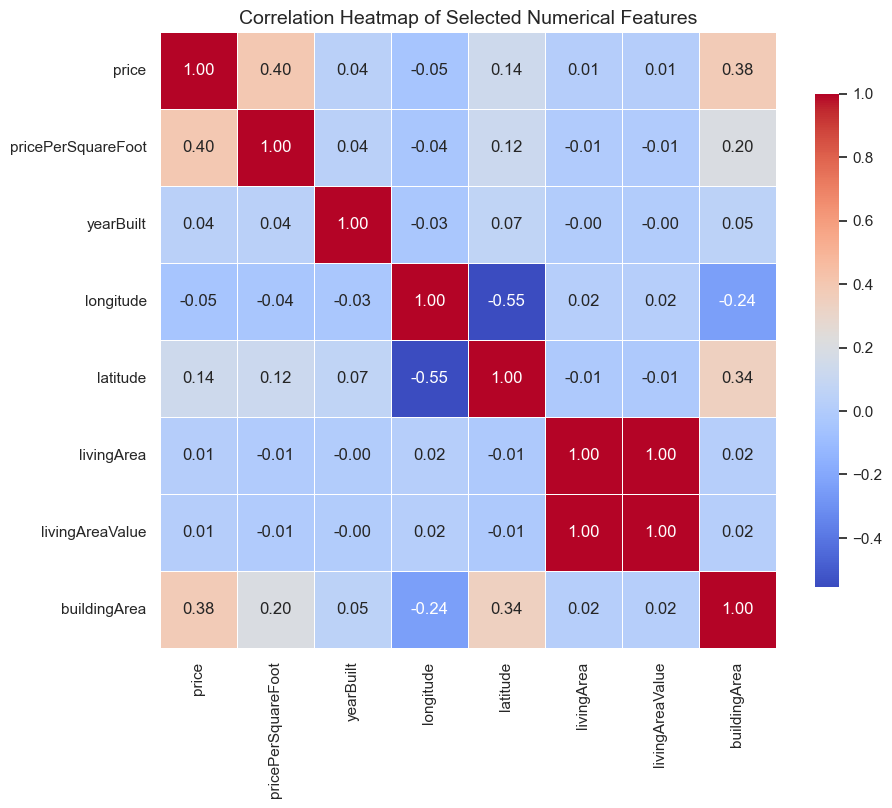

In [222]:
# List of features for correlation analysis
features = ['price', 'pricePerSquareFoot', 'yearBuilt', 'longitude', 'latitude', 
            'livingArea', 'livingAreaValue', 'buildingArea']

# Compute the correlation matrix
correlation_matrix = df[features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Selected Numerical Features', fontsize=14)

plt.show()

#### 15. Scatter plot matrix with log-transformed features [8 pts]

Highly skewed numerical variables can obscure relationships when visualized on their original scale.  
To address this, we’ll apply a log transformation before creating pairwise scatter plots.

**Task:**

- Select the following features:  
  `'price'`, `'pricePerSquareFoot'`, `'livingArea'`, and `'buildingArea'`  
- Apply the `np.log1p()` transformation to these features to reduce skewness.  
- Rename the transformed columns to clearly indicate that they are log-scaled (e.g., `log(price)`).  
- Include `'yearBuilt'` **without transformation**.

- Use `sns.PairGrid()` to create a **scatter plot matrix**:
  - Display scatter plots in the **lower triangle**
  - Plot histograms with KDE in the **diagonal**
  - Leave the **upper triangle empty**

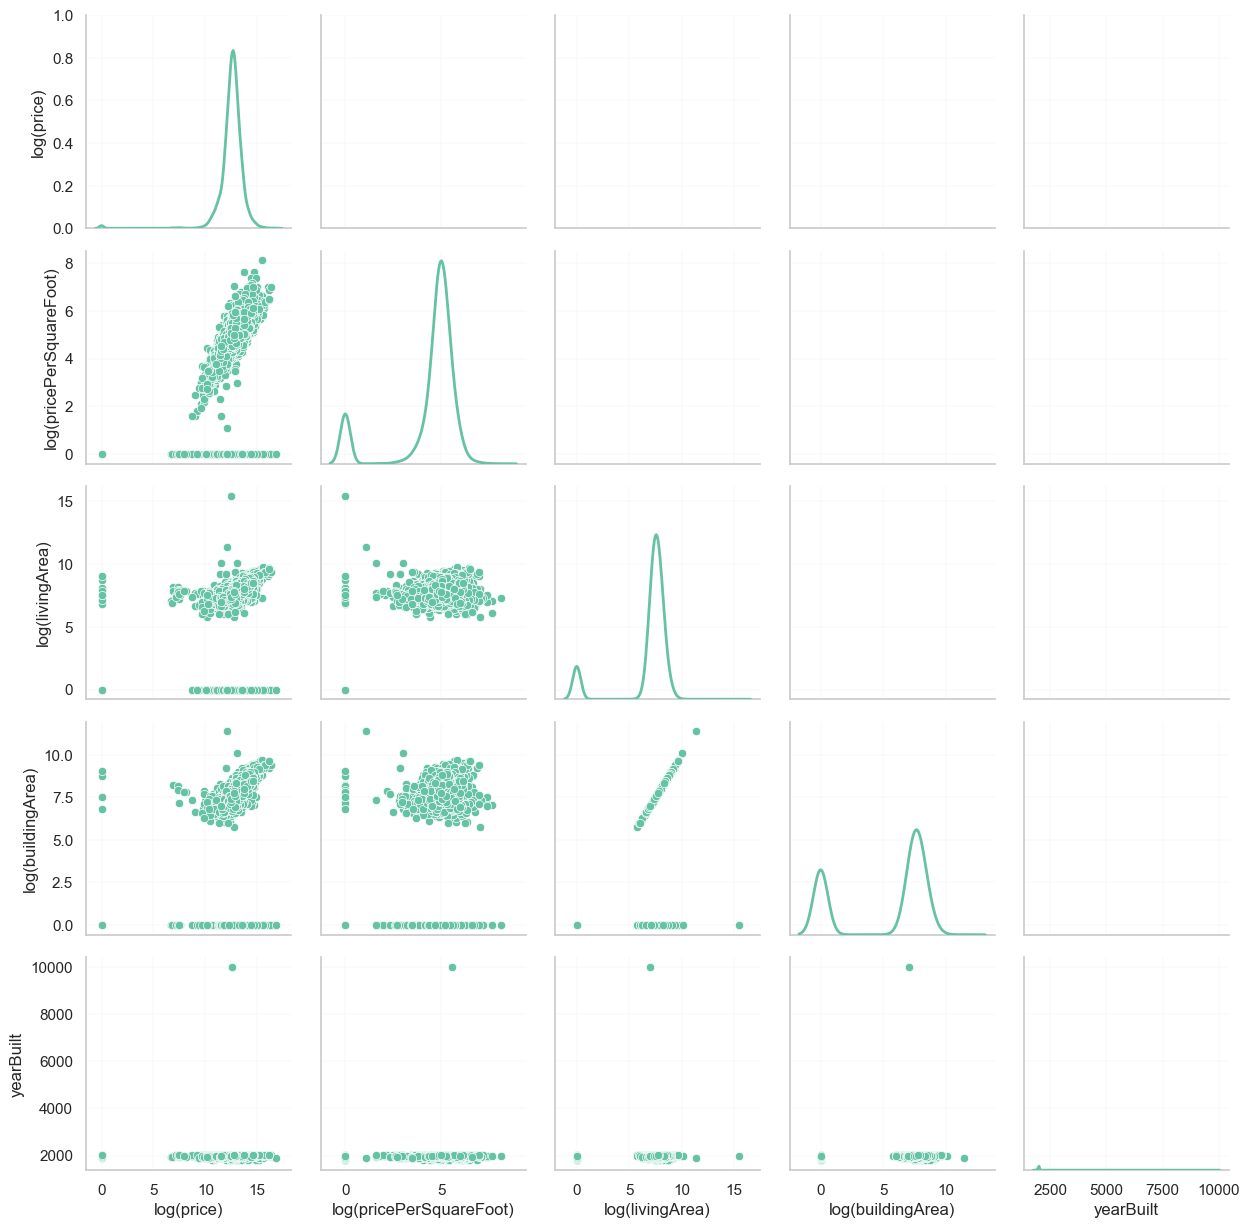

In [223]:
features = ['price', 'pricePerSquareFoot', 'livingArea', 'buildingArea', 'yearBuilt']

# Log transformation using np.log1p() to the selected features (except 'yearBuilt')
log_transformed = df[features].copy()
log_transformed[['price', 'pricePerSquareFoot', 'livingArea', 'buildingArea']] = np.log1p(df[['price', 'pricePerSquareFoot', 'livingArea', 'buildingArea']])

# Rename the columns to indicate log transformation
log_transformed.rename(columns={
    'price': 'log(price)', 
    'pricePerSquareFoot': 'log(pricePerSquareFoot)', 
    'livingArea': 'log(livingArea)', 
    'buildingArea': 'log(buildingArea)'
}, inplace=True)

# Creating the PairGrid
g = sns.PairGrid(log_transformed, vars=['log(price)', 'log(pricePerSquareFoot)', 'log(livingArea)', 'log(buildingArea)', 'yearBuilt'])

# Scatter plots in the lower triangle
g.map_lower(sns.scatterplot)

# Histograms with KDE in the diagonal
g.map_diag(sns.kdeplot, lw=2)

plt.show()

#### 16. Scatter Plot Matrix with Zero-Filtered Log-Transformed Features [6 pts]

Some numerical features contain zero values, which can distort visualizations and break log transformations.  
Remove rows with zeros and plot a scatter plot matrix as in the previous task.

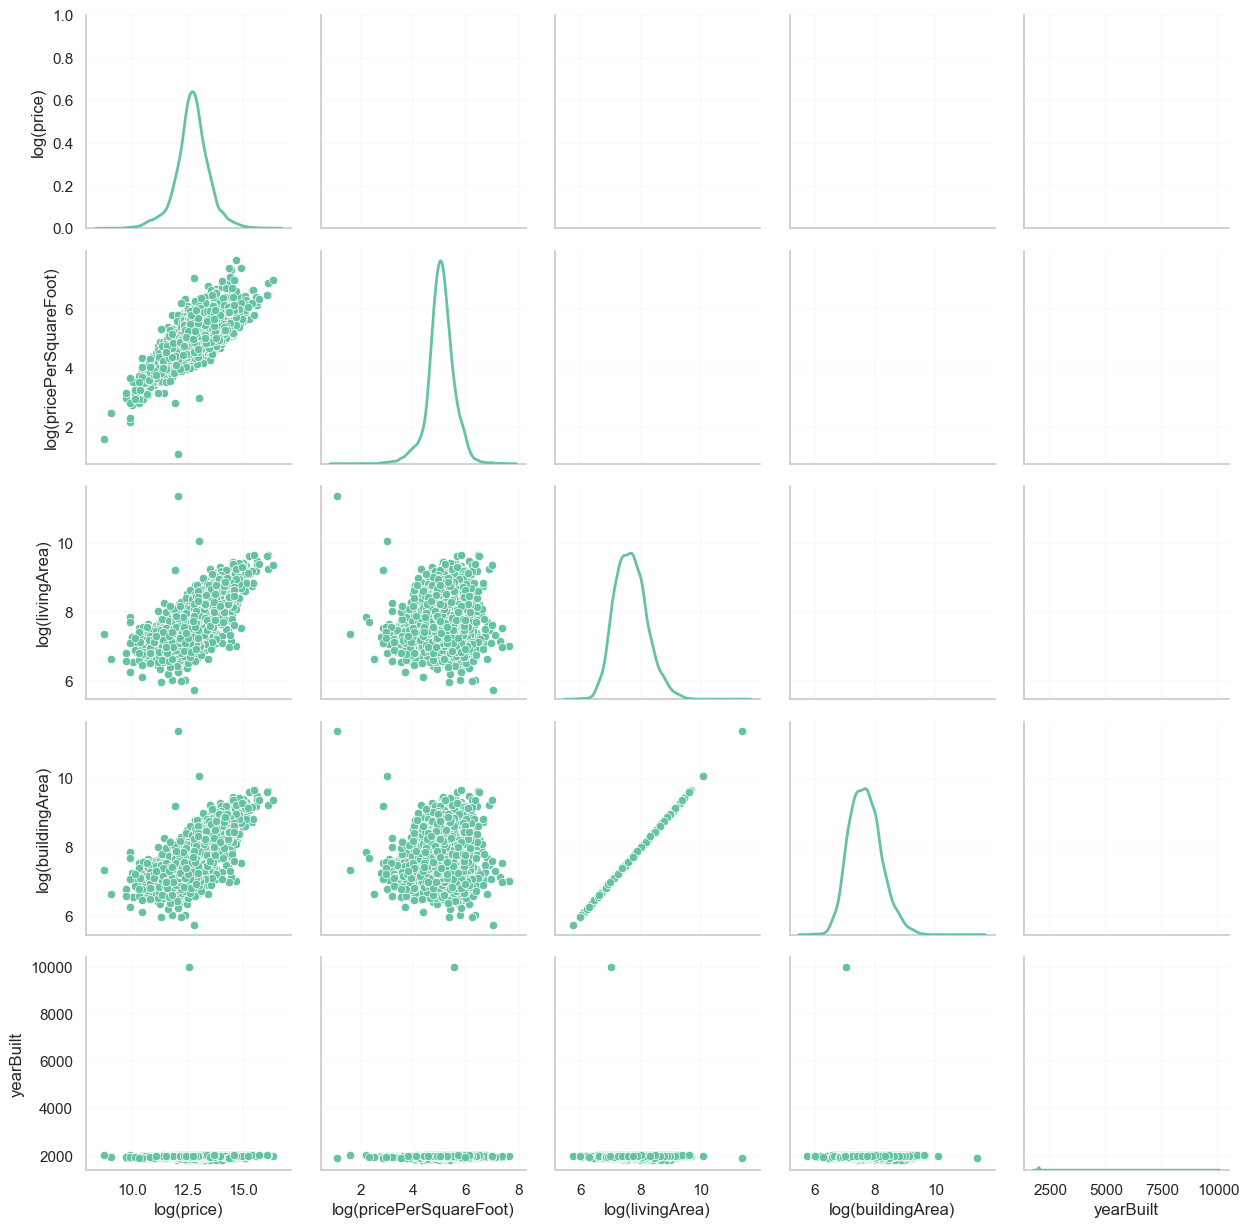

In [224]:
# Filter out rows that have zero values
df_filtered = df[(df[features] > 0).all(axis=1)]

# Apply log transformation using np.log1p() to the selected features (except 'yearBuilt')
log_transformed_filtered = df_filtered[features].copy()
log_transformed_filtered[['price', 'pricePerSquareFoot', 'livingArea', 'buildingArea']] = \
    np.log1p(df_filtered[['price', 'pricePerSquareFoot', 'livingArea', 'buildingArea']])

# Rename the columns to indicate log transformation
log_transformed_filtered.rename(columns={
    'price': 'log(price)', 
    'pricePerSquareFoot': 'log(pricePerSquareFoot)', 
    'livingArea': 'log(livingArea)', 
    'buildingArea': 'log(buildingArea)'
}, inplace=True)

# Creating the PairGrid
g = sns.PairGrid(log_transformed_filtered, vars=['log(price)', 'log(pricePerSquareFoot)', 'log(livingArea)', 'log(buildingArea)', 'yearBuilt'])

# Scatter plots in the lower triangle
g.map_lower(sns.scatterplot)

# Histograms with KDE in the diagonal
g.map_diag(sns.kdeplot, lw=2)

plt.show()

#### 17. Exploring Price vs Living Area Across Home Types

In this visualization, `price` is plotted against `livingArea` using a **log–log scale** to highlight multiplicative relationships between the two variables.  
The data is faceted by `homeType`, and both color (`hue`) and marker style are used to indicate whether a home has a garage (`hasGarage`).  
Zero values and extreme outliers are filtered out to maintain clarity and ensure fair comparisons.

We’ll examine the resulting plots and write **two clear conclusions** based on the observed patterns.

*You do not need to do anything here – just learn how this kind of visualization is created and interpreted.*


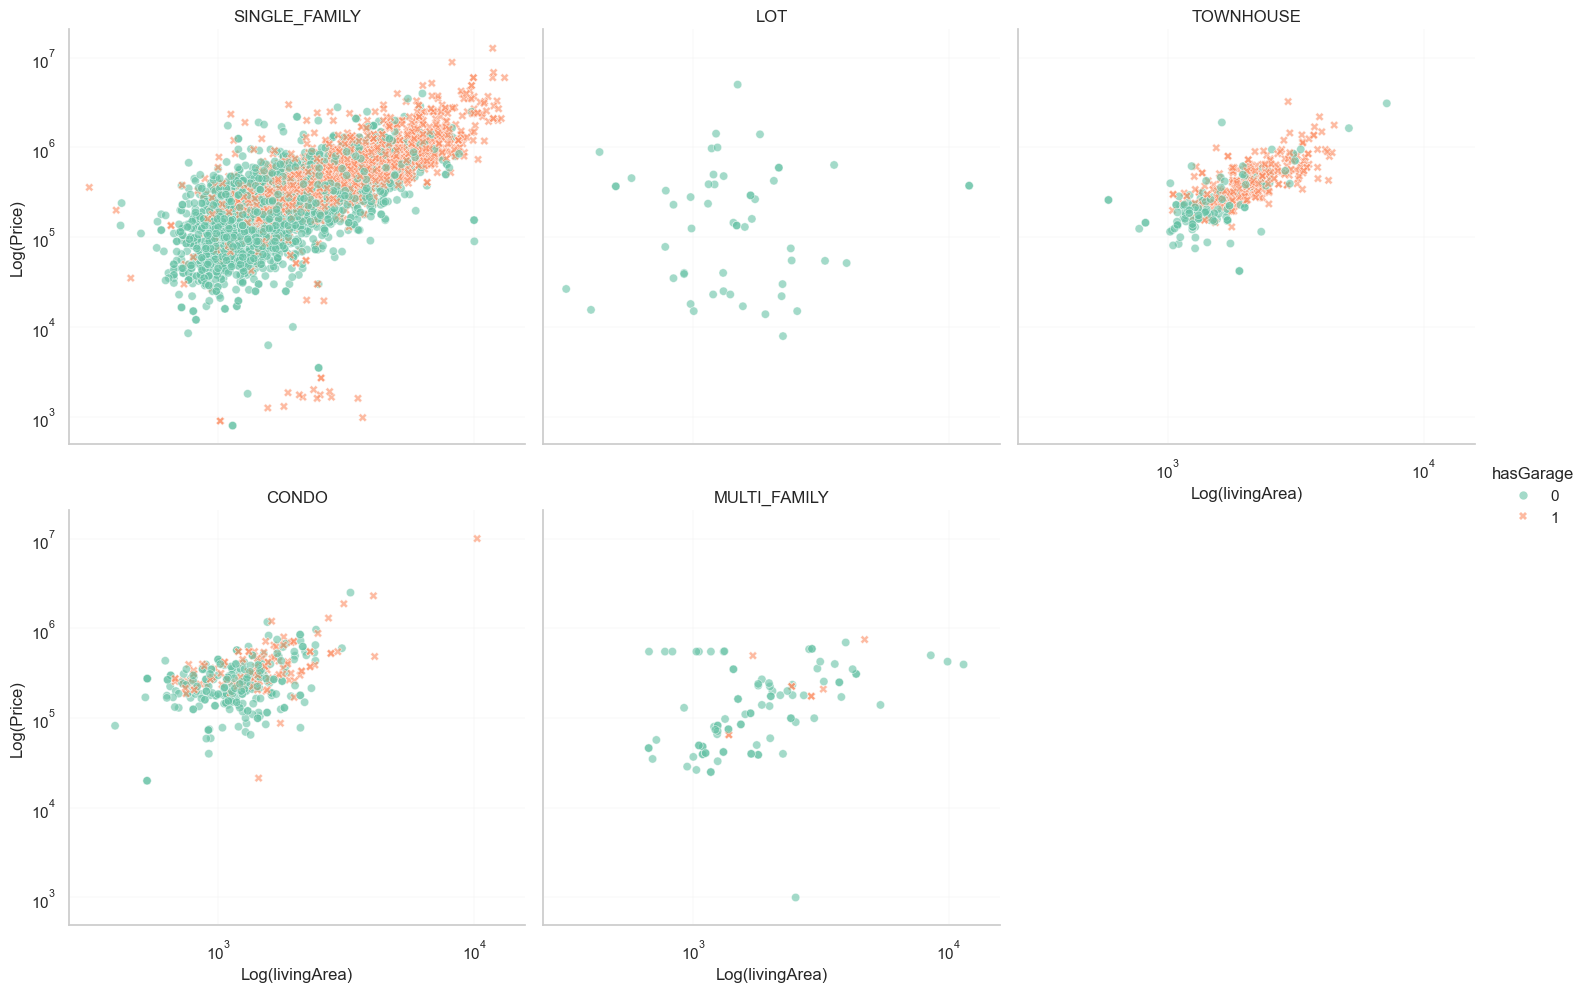

In [225]:
df_filtered = df[(df['price'] > 0) & (df['livingArea'] > 0) & (df['livingArea'] < 15000)]

g = sns.relplot(
    data=df_filtered,
    x='livingArea',
    y='price',
    col='homeType',
    col_wrap=3,
    hue='hasGarage',
    style='hasGarage',
    kind='scatter',
    alpha=0.6
)

g.set(xscale='log', yscale='log')
g.set_titles("{col_name}")
g.set_axis_labels("Log(livingArea)", "Log(Price)")
sns.despine()

#### The conclusions from small multiples

1. Log-linear relationship between living area and price  
   Across all `homeType` categories, there is a strong *positive log-linear relationship* between `livingArea` and `price`, meaning that price increases proportionally (or more) with living area on a logarithmic scale.

2. Garage presence is linked to higher size and value  
   Homes with a garage (`hasGarage = 1`) consistently appear in the upper-right region of each subplot.  
   These properties tend to be both larger and more expensive than those without garages, suggesting that garage presence is associated with higher-value homes across home types.

#### 18. Create your own small multiples [10 pts]

Now it's your turn!

**Task.**

- Choose a different numerical feature to plot against `price` in order to draw meaningful, non-trivial conclusions.  
  *Choose wisely – avoid features that are directly derived from price, such as `pricePerSquareFoot`.*

- Use `sns.relplot()` to create small multiples, similar to the previous example:
  - Consider using `hue` and/or `style` to differentiate by a binary variable like `hasGarage`, `isNewConstruction`, etc.
  - Apply log scaling to the axes where appropriate to improve interpretability.

- Clean and filter the data as needed (e.g., remove zero or extreme values that distort the plot).

**Then:**  
Write **two clear conclusions** based on your visualization – what patterns or differences do you observe across categories?


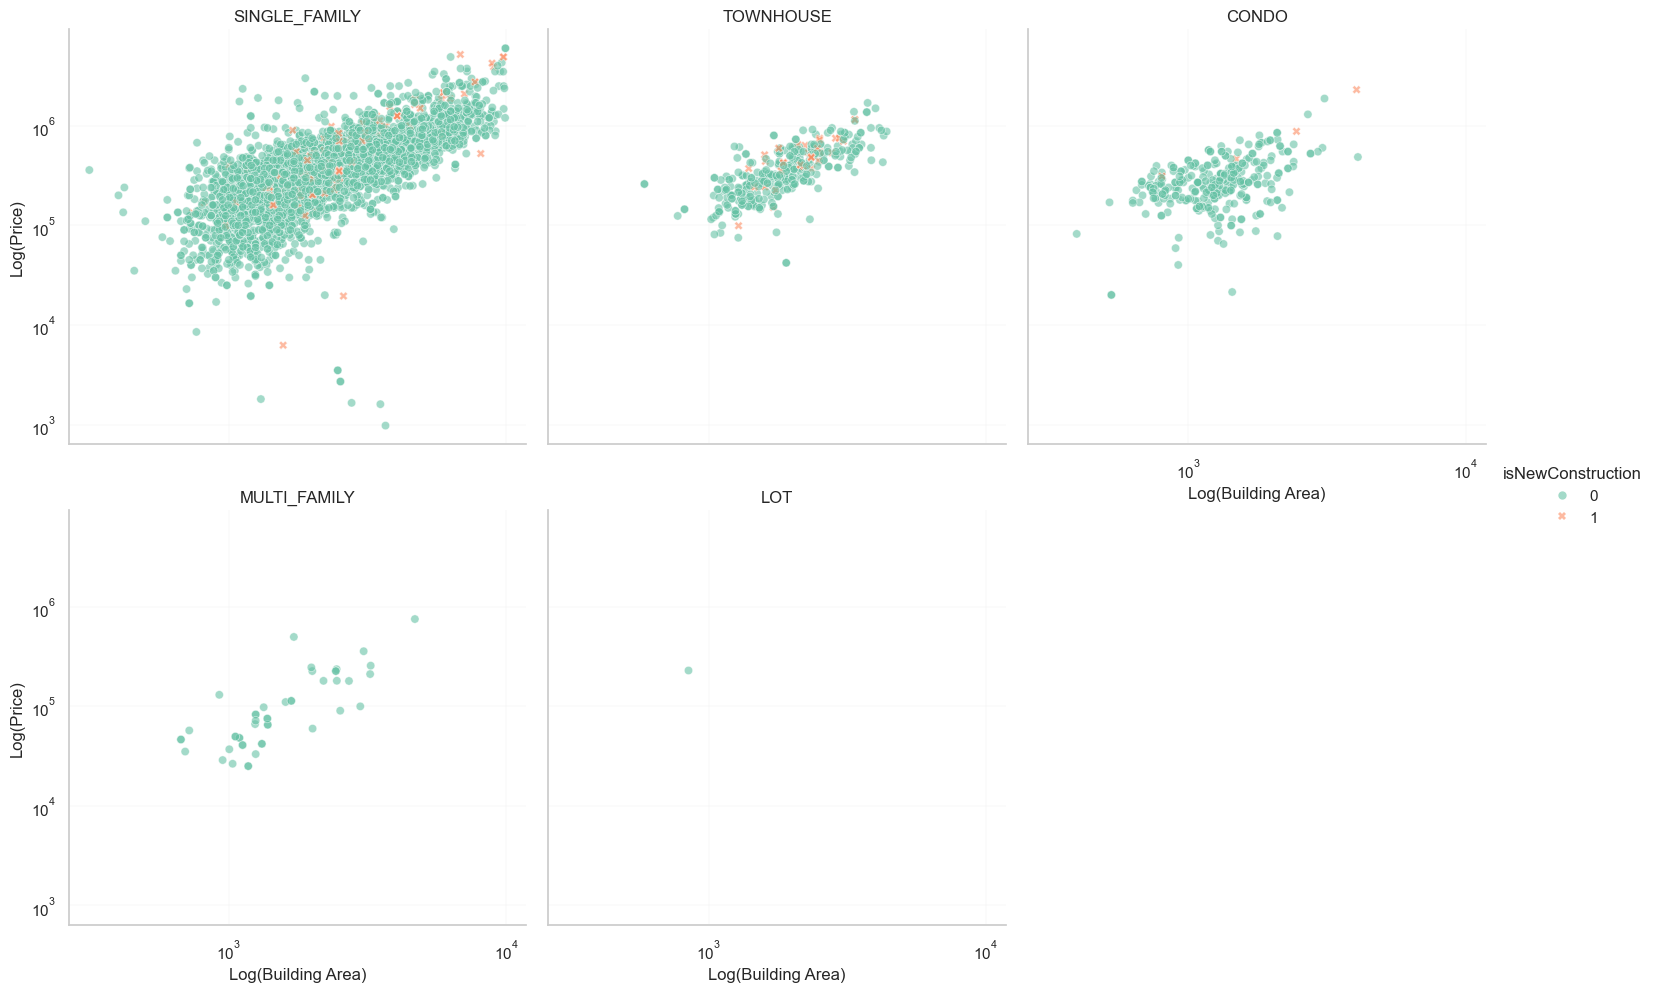

In [226]:
# Filter data toremove zero and extreme values to reduce distortion
df_filtered = df[(df['price'] > 0) & (df['buildingArea'] > 0) & (df['buildingArea'] < 10000)]

# buildingArea vs. price (color/style based on isNewConstruction)
g = sns.relplot(
    data=df_filtered,
    x='buildingArea',
    y='price',
    col='homeType',
    col_wrap=3,
    hue='isNewConstruction',
    style='isNewConstruction',
    kind='scatter',
    alpha=0.6
)

g.set(xscale='log', yscale='log')
g.set_titles("{col_name}")
g.set_axis_labels("Log(Building Area)", "Log(Price)")
sns.despine()

#### The conclusions from my small multiples

1. Larger buildings generally cost more
   Across most homeType categories, there’s a clear positive relationship between buildingArea and price. This trend is more linear when both axes are on a logarithmic scale, indicating proportional increases in price with increased size.

2. New construction homes cluster at higher prices
   Homes marked as isNewConstruction = 1 tend to appear in the upper-right of each plot, showing that new builds are often both larger and more expensive than existing homes. This pattern holds across various home types.